In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle
from fastapi import FastAPI

In [4]:
df = pd.read_csv('customer_churn_dataset-testing-master.csv')
df.head()

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0

In [5]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Churn'].replace({0:'No',1 : 'Yes'}, inplace=True)

/tmp/ipykernel_12273/1142319613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({0:'No',1 : 'Yes'}, inplace=True)


In [10]:
df

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0               1   22  Female      25               14              4   
1               2   41  Female      28               28              7   
2               3   47    Male      27               10              2   
3               4   35    Male       9               12              5   
4               5   53  Female      58               24              9   
...           ...  ...     ...     ...              ...            ...   
64369       64370   45  Female      33               12              6   
64370       64371   37    Male       6                1              5   
64371       64372   25    Male      39               14              8   
64372       64373   50  Female      18               19              7   
64373       64374   52  Female      45               15              9   

       Payment Delay Subscription Type Contract Length  Total Spend  \
0                 27             Basic         Monthly          598   
1                 13          Standard         Monthly          584   
2                 29           Premium          Annual          757   
3                 17           Premium       Quarterly          232   
4                  2          Standard          Annual          533   
...              ...               ...             ...          ...   
64369             21             Basic       Quarterly          947   
64370             22          Standard          Annual          923   
64371             30           Premium         Monthly          327   
64372             22          Standard         Monthly          540   
64373             25          Standard         Monthly          696   

       Last Interaction Churn  
0                     9   Yes  
1                    20    No  
2                    21    No  
3                    18    No  
4                    18    No  
...                 ...   ...  
64369                14   Yes  
64370                 9   Yes  
64371                20   Yes  
64372                13   Yes  
64373                22   Yes  

[64374 rows x 12 columns]

In [11]:
df.describe()

CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  
count   64374.000000   64374.000000  64374.000000      64374.000000  
mean        5.400690      17.133952    541.023379         15.498850  
std         3.114005       8.852211    260.874809          8.638436  
min         0.000000       0.000000    100.000000          1.000000  
25%         3.000000      10.000000    313.000000          8.000000  
50%         6.000000      19.000000    534.000000         15.000000  
75%         8.000000      25.000000    768.000000         23.000000  
max        10.000000      30.000000   1000.000000         30.000000

In [12]:
# check the unique values in each variable

for i in df.columns:
    print('No. of unique values in', i, 'are:', df[i].nunique())

No. of unique values in CustomerID are: 64374
No. of unique values in Age are: 48
No. of unique values in Gender are: 2
No. of unique values in Tenure are: 60
No. of unique values in Usage Frequency are: 30
No. of unique values in Support Calls are: 11
No. of unique values in Payment Delay are: 31
No. of unique values in Subscription Type are: 3
No. of unique values in Contract Length are: 3
No. of unique values in Total Spend are: 901
No. of unique values in Last Interaction are: 30
No. of unique values in Churn are: 2


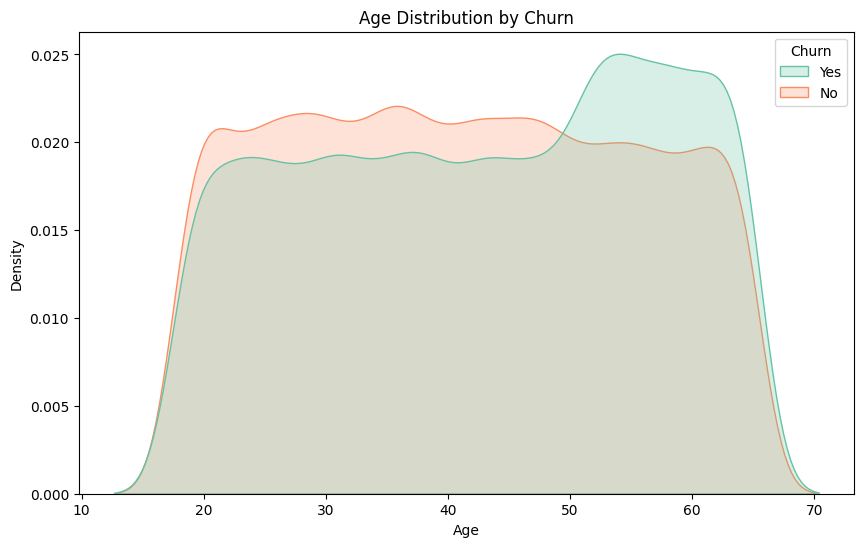

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()
#The **KDE plot** shows the smooth **Age** distribution for churned vs. non-churned customers, helping to compare their density patterns.
# 1 churned customers or 0 non-churned customers

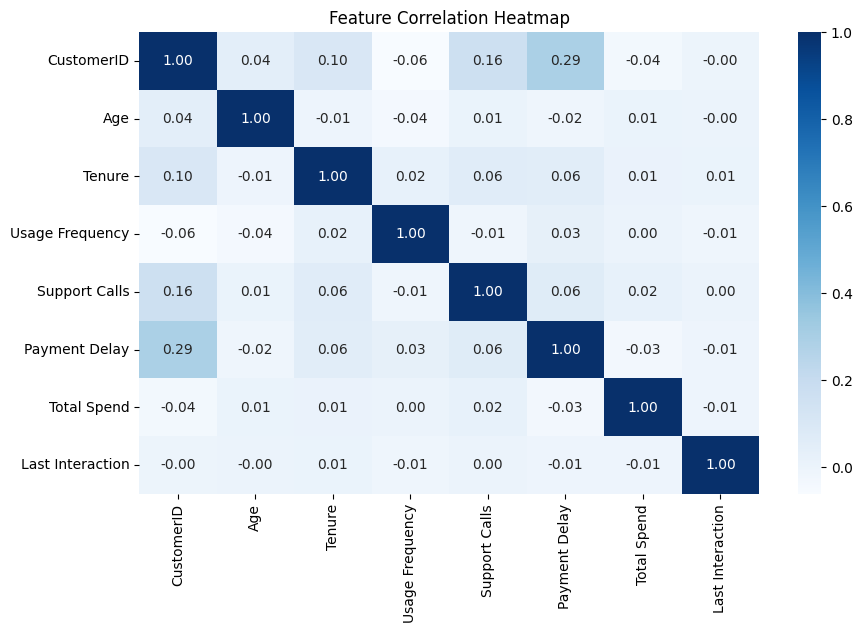

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 1 strong positive
# -1 strong negative
# 0 no correlation or on relationship between the features

In [16]:
# Identify numerical and categorical columns
numerical = []
categorical = []
columns_to_drop = ['CustomerID', 'Gender'] # check gender befor droping
target = 'Churn'

for column in df.columns:
    if column == target or column in columns_to_drop:
        continue
    if df[column].dtype != 'O':
        numerical.append(column)
    else:
        categorical.append(column)

In [17]:
# Drop unnecessary columns
def drop_column(x):
    return x.drop(columns=columns_to_drop)

In [18]:
categorical

['Subscription Type', 'Contract Length']

In [19]:
numerical

['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']

In [22]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
OneHotEncoder().fit_transform(df[categorical]).toarray()

2025-02-24 12:52:37.808350: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-24 12:52:37.831511: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-24 12:52:38.069612: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-24 12:52:38.242135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740376358.476809   12273 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740376358.52

array([[1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.]])

In [24]:
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder().fit_transform(df[categorical])

array([[0., 1.],
       [2., 1.],
       [1., 0.],
       ...,
       [1., 1.],
       [2., 1.],
       [2., 1.]])

In [25]:
# Transformers for numerical and categorical features
numerical_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

categorical_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder())
])

In [26]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical),
    ('categorical', categorical_transformer, categorical)
])

pipeline = Pipeline([
    ('drop', FunctionTransformer(drop_column)),
    ('prepro', preprocessor)
])

In [27]:
preprocessor.fit_transform(df)

array([[-1.43420211, -0.40909964, -0.12252553, ...,  0.        ,
         1.        ,  0.        ],
       [-0.0697304 , -0.23364156,  1.46542392, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36115541, -0.29212759, -0.57622537, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.21875921,  0.40970473, -0.12252553, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57659831, -0.81850183,  0.44459927, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.72022691,  0.76062088, -0.00910057, ...,  0.        ,
         1.        ,  0.        ]])

In [37]:
# Training pipelines for different models
training_pipeline_Forest = Pipeline([
    ('drop_columns', FunctionTransformer(drop_column)),
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier())
])

In [38]:
# Split the data into training and testing sets
x, y = df.drop(columns=target), df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
training_pipeline_Forest.fit(x_train, y_train)

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_column at 0x7cade45d6ac0>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Subscription Type',
                                                   'Contract Length'])])),
                ('model', RandomForestClassifier())])

In [40]:
y_predictionForest = training_pipeline_Forest.predict(x_test)


In [41]:
cmforest = confusion_matrix(y_test,y_predictionForest)
cmforest# good model

array([[6230,  563],
       [  42, 6040]])

In [42]:
import joblib 
joblib.dump(Pipeline, 'preprocessor_churn.pkl')

['preprocessor_churn.pkl']

In [43]:
# Convert target labels to numeric if necessary
y_train = y_train.replace({'No': 0, 'Yes': 1})
y_test = y_test.replace({'No': 0, 'Yes': 1})




/tmp/ipykernel_12273/1904184130.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'No': 0, 'Yes': 1})
/tmp/ipykernel_12273/1904184130.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'No': 0, 'Yes': 1})


In [44]:
# Ensure x_train and x_test are arrays after preprocessing
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)



In [ ]:
# Input shape fix
input_shape = x_train_transformed.shape[1]
input_shape #number of columns in the x_train_transformed array.

13

In [47]:
# Updated neural network model
model = Sequential([
    InputLayer(input_shape=(input_shape,)),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/home/oudom/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-02-24 13:18:00.520272: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [48]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_transformed, y_train, epochs=10, validation_data=(x_test_transformed, y_test))

Epoch 1/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8586 - loss: 0.2992 - val_accuracy: 0.9194 - val_loss: 0.1776
Epoch 2/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9207 - loss: 0.1730 - val_accuracy: 0.9281 - val_loss: 0.1556
Epoch 3/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9280 - loss: 0.1557 - val_accuracy: 0.9313 - val_loss: 0.1452
Epoch 4/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9329 - loss: 0.1441 - val_accuracy: 0.9323 - val_loss: 0.1503
Epoch 5/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9379 - loss: 0.1364 - val_accuracy: 0.9397 - val_loss: 0.1283
Epoch 6/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9398 - loss: 0.1307 - val_accuracy: 0.9443 - val_loss: 0.1236
Epoch 7/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9416 - loss: 0.1277 - val_accuracy: 0.9396 - val_loss: 0.1308
Epoch 8/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9426 - loss: 0.1224 -

In [49]:
x_train_transformed #displaying the x_train_transformed array.

array([[ 1.00748863,  0.58691645, -0.46172589, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.86400944,  1.63912853, -1.14230525, ...,  0.        ,
         0.        ,  1.        ],
       [-0.78600122, -1.16677034, -1.48259492, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.64252203,  0.87919758, -0.68858568, ...,  0.        ,
         0.        ,  1.        ],
       [-1.28817837,  1.46375985,  0.44571325, ...,  1.        ,
         0.        ,  0.        ],
       [-0.64252203,  0.11926664,  0.44571325, ...,  0.        ,
         0.        ,  1.        ]])

In [50]:
model.save('model.keras') #saving the model.

In [51]:
x_test_transformed.shape 

(12875, 13)

In [52]:
x_test_transformed #displaying the x_test_transformed array.

array([[ 0.93574903, -0.69912053,  1.01286271, ...,  0.        ,
         1.        ,  0.        ],
       [-1.00122   , -0.28992695,  1.69344206, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.65314497,  1.63912853,  0.21885346, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.72053025,  1.05456626, -0.91544546, ...,  0.        ,
         0.        ,  1.        ],
       [-1.57513675,  1.40530362,  1.1262926 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.2183531 ,  0.93765381,  0.67257303, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
model.predict(x_test_transformed)
# Load the model


403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.1075286e-09],
       [1.2344663e-10],
       [9.9997759e-01],
       ...,
       [1.0000000e+00],
       [1.9401123e-04],
       [2.4815949e-06]], dtype=float32)

In [54]:
app = FastAPI()

In [ ]:
@app.post("/predict")
def predict(data: dict):
    # Load model
    with open("model.pkl", "rb") as f:
        model, scaler = pickle.load(f)
    
    # Convert input to DataFrame
    input_data = pd.DataFrame([data])
    input_data = pd.get_dummies(input_data, drop_first=True)
    input_data = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data)
    return {"Churn Prediction": int(prediction[0])}
